### Step 1. Open data file

In the first step I will get a general view of the various data sources and any glaring issues with data-types or missing information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats as st

try:
    df_calls = pd.read_csv('../datasets/megaline_calls.csv')
except:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv','\t')

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [2]:
df_calls.sample(5)

,id,user_id,call_date,duration
83122,1301_36,1301,2018-12-19,14.93
78259,1280_287,1280,2018-10-19,14.58
17500,1067_4,1067,2018-11-30,0.00
109107,1385_177,1385,2018-09-23,6.59
41559,1153_250,1153,2018-11-24,8.13


In [4]:
try:
    df_internet = pd.read_csv('../datasets/megaline_internet.csv')
except:
    df_internet = pd.read_csv('/datasets/megaline_internet.csv','\t')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
df_internet.sample(5)

,id,user_id,session_date,mb_used
36492,1164_175,1164,2018-06-01,0.00
52922,1239_31,1239,2018-12-31,203.32
5379,1029_175,1029,2018-09-11,480.78
14500,1066_394,1066,2018-03-16,353.08
3359,1018_314,1018,2018-12-28,190.46


In [6]:
try:
    df_messages = pd.read_csv('../datasets/megaline_messages.csv')
except:
    df_messages = pd.read_csv('/datasets/megaline_messages.csv','\t')

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
try:
    df_plans = pd.read_csv('../datasets/megaline_plans.csv')
except:
    df_plans = pd.read_csv('/datasets/megaline_plans.csv','\t')

df_plans.head()
# general information for plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
try:
    df_users = pd.read_csv('../datasets/megaline_users.csv')
except:
    df_users = pd.read_csv('/datasets/megaline_users.csv','\t')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaN
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN


The datasets for analysis include: user data, plan data, and data on individual calls, messages, and internet sessions. The date strings will need to be converted to dateTime and telephone minute usage needs to be rounded up (as per charging stipulation). All of the various media tables will need to be summed for each user in order to synthesize these tables into one.

### Step 2. Data preprocessing

In [13]:
print("Null values:")
print(df_calls.isnull().sum()) # none
df_calls.describe() # minimum call duration of 0, should leave entries of 0 out
df_calls = df_calls.query('duration > 0')
df_calls['duration'].describe()
# no visible outliers

Null values:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

In [14]:
print("Null values:")
print(df_internet.isnull().sum())
df_internet = df_internet.query('mb_used > 0')
df_internet['mb_used'].describe()
# no visible outliers

Null values:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


count    91078.000000
mean       422.064206
std        255.063501
min          0.010000
25%        223.380000
50%        395.905000
75%        588.367500
max       1693.470000
Name: mb_used, dtype: float64

In [16]:
# take the state string from within city string
df_users['state'] = df_users['city'].str.extract(r'([A-Z|\-]+) MSA')
print(df_users.isna().sum())
df_users['state'].value_counts()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
state           0
dtype: int64


NY-NJ-PA       80
CA             78
TX             39
FL             25
IL-IN-WI       19
PA-NJ-DE-MD    17
MI             16
GA             14
WA             13
TN             12
MA-NH          12
DC-VA-MD-WV    11
MN-WI          11
AZ             11
OH              9
LA              9
CO              9
OR-WA           8
NC-SC           8
OH-KY-IN        8
SC              7
NV              7
CT              6
NY              6
IN              6
OK              6
PA              5
KY-IN           5
HI              5
AL              4
VA-NC           4
MD              4
VA              4
RI-MA           3
UT              3
WI              3
MO-IL           3
NM              2
MO-KS           2
NE-IA           2
TN-MS-AR        2
NC              2
Name: state, dtype: int64

#### Data Type Conversion

In [17]:
try:
    df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
    df_calls['call_month'] = df_calls['call_date'].dt.month
    df_calls['duration'] = np.ceil(df_calls['duration'])
    df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
    df_internet['session_month'] = df_internet['session_date'].dt.month
    df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
    df_messages['message_month'] = df_messages['message_date'].dt.month
    df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
    df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
    df_calls.info()
    df_internet.info()
    df_messages.info()
except:
    print('Error converting')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  float64       
 4   call_month  110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             91078 non-null  object        
 1   user_id        91078 non-null  int64         
 2   session_date   91078 non-null  datetime64[ns]
 3   mb_used        91078 non-null  float64       
 4   session_month  91078 non-null  int64         


In [18]:
#The number of calls made and minutes used per month
months = ["","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
for n in range(1,13):
    df = (
        df_calls
        .query("call_month == @n")
        .pivot_table(index='user_id',values='duration',aggfunc=['count','sum'])
    )
    df.columns = [months[n]+"_call_count",months[n]+"_call_sum"]
    df_users = pd.merge(df_users,df,how='outer',on='user_id')
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,jan_call_count,...,aug_call_count,aug_call_sum,sep_call_count,sep_call_sum,oct_call_count,oct_call_sum,nov_call_count,nov_call_sum,dec_call_count,dec_call_sum
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,NaN,...,NaN,NaN,8.0,70.0,49.0,470.0,50.0,413.0,38.0,344.0
115,1115,Yevette,Yang,21,"El Paso, TX MSA",2018-11-19,surf,NaT,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,342.0,93.0,883.0
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10,NC-SC,NaN,...,30.0,262.0,60.0,595.0,63.0,518.0,68.0,600.0,41.0,425.0
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaT,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,67.0,566.0
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaT,OR-WA,NaN,...,24.0,222.0,49.0,445.0,43.0,369.0,47.0,389.0,45.0,376.0


In [19]:
#The number of text messages sent per month
for n in range(1,13):
    df = (
        df_messages
        .query("message_month == @n")
        .pivot_table(index='user_id',values="message_month",aggfunc=['count'])
    )
    df.columns = [months[n]+"_message_count"]
    df_users = pd.merge(df_users,df,how='outer',on='user_id')

In [20]:
#The volume of data per month
# rounding function for monthly mb to gb
def round_up_mbs(value):
    # 1 gb = 1024 mb
    return int(np.ceil(value / 1024)) * 1024

for n in range(1,13):
    df = (
        df_internet
        .query("session_month == @n")
        .pivot_table(index='user_id',values='mb_used',aggfunc=['sum'])
    )
    df.columns = [months[n]+"_mb_sum"]
    df[months[n]+"_mb_sum"] = df.apply(round_up_mbs,axis=1)
    df_users = pd.merge(df_users,df,how='outer',on='user_id')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            500 non-null    int64         
 1   first_name         500 non-null    object        
 2   last_name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   reg_date           500 non-null    datetime64[ns]
 6   plan               500 non-null    object        
 7   churn_date         34 non-null     datetime64[ns]
 8   state              500 non-null    object        
 9   jan_call_count     6 non-null      float64       
 10  jan_call_sum       6 non-null      float64       
 11  feb_call_count     15 non-null     float64       
 12  feb_call_sum       15 non-null     float64       
 13  mar_call_count     35 non-null     float64       
 14  mar_call_s

In [21]:
#The monthly profit from each user 
def monthly_profit(row,month):
    if row['plan'] == 'surf':
        plan_id = 0
    else :
        plan_id = 1
    plan_message_limit = df_plans['messages_included'][plan_id]
    plan_mb_limit = df_plans['mb_per_month_included'][plan_id]
    plan_minute_limit = df_plans['minutes_included'][plan_id]
    overage_message = max(plan_message_limit - row[month+"_message_count"],0)
    overage_rate_message = df_plans['usd_per_message'][plan_id]
    overage_mb = max(plan_mb_limit-row[month+"_mb_sum"],0)
    overage_rate_gb = df_plans['usd_per_gb'][plan_id]
    overage_minute = max(plan_mb_limit - row[month+"_mb_sum"],0)
    overage_rate_minute = df_plans['usd_per_minute'][plan_id]
    monthly_fee = df_plans['usd_monthly_pay'][plan_id]
    return (
        (overage_message*overage_rate_message)+(round(overage_mb/1024*overage_rate_gb,2))+(overage_minute*overage_rate_minute)+monthly_fee
    )

for n in range(1,13):
    df_users[months[n]+"_profit"] = df_users.apply(monthly_profit,axis=1,month=months[n])
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,jan_call_count,...,mar_profit,apr_profit,may_profit,jun_profit,jul_profit,aug_profit,sep_profit,oct_profit,nov_profit,dec_profit
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562.61
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,NaN,...,NaN,NaN,NaN,NaN,NaN,346.36,60.90,20.00,20.42,20.18
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.81,20.54,20.27
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA,NaN,...,NaN,NaN,347.05,20.96,20.72,20.75,20.87,20.78,20.75,20.57


In [22]:
df_users.describe()

,user_id,age,jan_call_count,jan_call_sum,feb_call_count,feb_call_sum,mar_call_count,mar_call_sum,apr_call_count,apr_call_sum,...,mar_profit,apr_profit,may_profit,jun_profit,jul_profit,aug_profit,sep_profit,oct_profit,nov_profit,dec_profit
count,500.000000,500.000000,6.000000,6.000000,15.000000,15.000000,35.000000,35.000000,71.000000,71.000000,...,23.000000,51.000000,76.000000,109.000000,137.000000,179.000000,221.000000,274.000000,327.000000,379.000000
mean,1249.500000,45.486000,22.166667,196.666667,41.933333,366.333333,37.428571,321.171429,39.507042,347.197183,...,193.834348,260.440000,188.981579,191.051927,178.067299,163.588101,167.893394,159.278796,169.249755,148.496807
std,144.481833,16.972269,12.998718,114.611809,26.871298,238.701447,25.400655,208.275056,23.884767,213.589635,...,205.804440,196.778208,177.261309,185.181651,179.299191,165.078740,166.188919,162.155117,168.335774,156.345158
min,1000.000000,18.000000,2.000000,16.000000,4.000000,39.000000,3.000000,23.000000,2.000000,16.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,1124.750000,30.000000,15.000000,130.750000,27.500000,248.500000,16.000000,148.000000,21.000000,189.500000,...,20.975000,41.005000,20.772500,20.810000,20.780000,20.630000,20.600000,20.427500,20.600000,20.345000
50%,1249.500000,46.000000,25.000000,234.000000,36.000000,307.000000,37.000000,307.000000,38.000000,321.000000,...,79.740000,269.150000,102.505000,102.790000,101.440000,79.260000,101.440000,79.260000,101.440000,60.720000
75%,1374.250000,61.000000,32.750000,289.250000,58.000000,481.000000,48.000000,430.500000,56.000000,490.500000,...,331.655000,455.220000,325.485000,338.010000,338.140000,286.600000,320.650000,299.147500,303.850000,286.130000
max,1499.000000,75.000000,34.000000,292.000000,88.000000,811.000000,99.000000,788.000000,109.000000,1043.000000,...,550.770000,591.490000,550.830000,591.340000,591.310000,591.520000,591.520000,590.080000,591.490000,591.460000


There were call/internet usages of 0 min/mbs (essentially non-entries) that were removed. Significant data have types converted and month added to each media consumption table in order to do monthly analysis. 

The monthly usage for messages/call minutes/mb has been added to each user. It's possible to see the growth of the users throughtout the months of the year. There are very few entries in the first half of the year. All the other variables (median, etc.) for monthly profit seem consistent throughout the year without outliers but requires further investigation. 

### Step 3. Analyze the data

We will start by plotting the monthly medians throughout the year to get a 'big-picture' view of changes throughout the year. Hopefully this will give me an idea of which month(s) to focus my analysis because doing the monthly analysis 12 times is tedious and unnecessary.

In [23]:
def year_df (df):
    month_list = []
    for n in range(1,13):
            month_row = {
                'users' : df[months[n]+"_profit"].notna().sum(),
                'call_count_median': df[months[n]+"_call_count"].median(),
                'call_sum_median' : df[months[n]+"_call_sum"].median(),
                'messages_median' : df[months[n]+"_message_count"].median(),
                'mbs_median': df[months[n]+"_mb_sum"].median(),
                'profit_median': df[months[n]+"_profit"].median()
            }
            month_list.append(month_row)

    return pd.DataFrame(month_list)
# created a function that builds a new dataframe to show the monthly medians on the various media consumptions/profit for the year
df_all_year = year_df(df_users)
df_all_year.describe()

,users,call_count_median,call_sum_median,messages_median,mbs_median,profit_median
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,149.250000,43.333333,382.833333,28.708333,15957.333333,146.198750
std,127.534042,7.773303,71.494543,8.086066,2836.728120,110.486782
min,4.000000,25.000000,234.000000,15.000000,7680.000000,60.720000
25%,44.000000,37.750000,317.500000,21.750000,16128.000000,79.620000
50%,123.000000,46.500000,414.000000,29.000000,16384.000000,101.440000
75%,234.250000,48.500000,433.750000,35.000000,17408.000000,140.127500
max,379.000000,51.000000,450.500000,42.000000,18432.000000,424.500000


<AxesSubplot:>

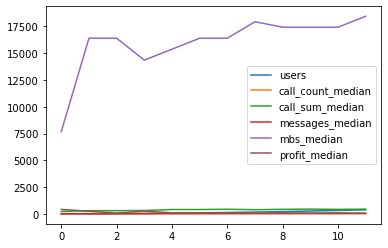

In [24]:
df_all_year.plot()
# the mb_used data is messing up the range of data in comparison so I will scale it down to GBs

<AxesSubplot:>

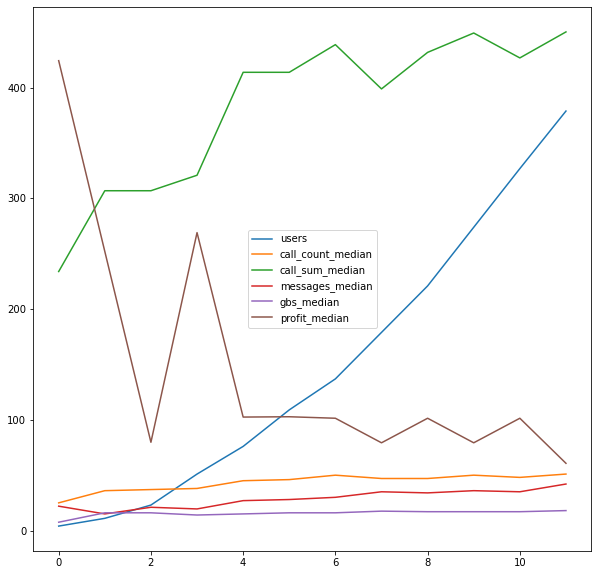

In [25]:
df_all_year['mbs_median'] = df_all_year['mbs_median'] / 1024
df_all_year.rename(columns={'mbs_median': 'gbs_median'}, inplace=True)
df_all_year.plot(figsize=(10,10))

By the above graph we can see as the number of users increases, the more steady the media usage medians from month to month become. This makes perfect sense by law of large numbers. As the earlier months have little data with greater profit variances I will only analyse the last month - December. There is also a slightly increasing median duration of calls while the median number of calls stays steady. This could be explained by users growing comfortability with the service making longer calls, requires further analysis.

#### Number of calls

----------------------------
ALL USER DATA
dec_call_count
COUNT:  460
MEAN: 53.62
VARIANCE: 718.44
STANDARD DEVIATION: 26.80
----------------------------


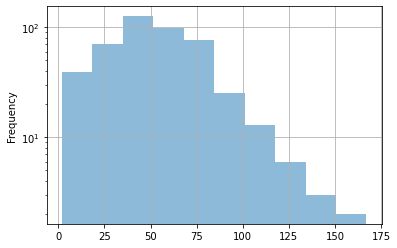

In [26]:
df_users.name = "ALL USER DATA"
# create function to calculate entry count, mean, var and std
def analyze(df,col):
    print("----------------------------")
    print(df.name)
    print(col)
    count = df[col].notna().sum()
    print("COUNT: ",count)
    mean = df[col].mean()
    print("MEAN: {:.2f}".format(mean))
    variance = np.var(df[col])
    print("VARIANCE: {:.2f}".format(variance))
    standard_deviation = np.sqrt(variance)
    print("STANDARD DEVIATION: {:.2f}".format(standard_deviation))
    df[col].plot(kind='hist',grid=True,log=True,alpha=0.5)
    print("----------------------------")
    
analyze(df_users,'dec_call_count')

The number of call in December graph has a poisson distribution.

In [27]:
# function to compare dataframe with the analysis function
def compare(dfs,col):
    for df in dfs:
        analyze(df,col)
        
# creating seperate dataframes for users on the different monthly plans
df_surf = df_users.query('plan == "surf"')
df_surf.name = "USERS WITH SURF PLAN"
df_ultimate = df_users.query('plan == "ultimate"')
df_ultimate.name = "USERS WITH ULTIMATE PLAN"
surf_user_count = df_surf.notna().sum()[0]
ultimate_user_count = df_ultimate.notna().sum()[0]
print("There are ",surf_user_count," users with surf plan and ",ultimate_user_count, " users with ultimate plan.")

There are  339  users with surf plan and  161  users with ultimate plan.


----------------------------
USERS WITH SURF PLAN
dec_call_count
COUNT:  311
MEAN: 54.00
VARIANCE: 705.23
STANDARD DEVIATION: 26.56
----------------------------
----------------------------
USERS WITH ULTIMATE PLAN
dec_call_count
COUNT:  149
MEAN: 52.84
VARIANCE: 745.11
STANDARD DEVIATION: 27.30
----------------------------


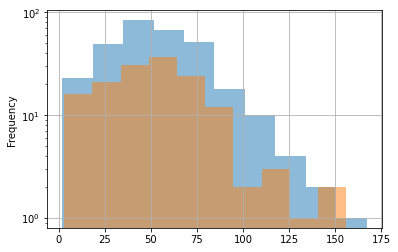

In [28]:
surf_and_ultimate = [df_surf,df_ultimate]
compare(surf_and_ultimate,'dec_call_count')

It appear by comparison that the surf plan users make slightly more calls but the ultimate plan data has a larger variance. 

In [29]:
# creating seperate dataframes for users in NY-NJ versus others
df_ny_nj = df_users.query('state == "NY" or state == "NY-NJ-PA" or state == "PA-NJ-DE-MD"')
df_ny_nj.name = "USERS IN NY OR NJ"
df_other = df_users.query('state != "NY" and state != "NY-NJ-PA" and state != "PA-NJ-DE-MD"')
df_other.name = "USERS IN OTHER STATES"
ny_nj_user_count = df_ny_nj.notna().sum()[0]
other_user_count = df_other.notna().sum()[0]
print("There are ",ny_nj_user_count," users in NY-NJ and ",other_user_count, " users in other states.")

There are  103  users in NY-NJ and  397  users in other states.


----------------------------
USERS IN NY OR NJ
dec_call_count
COUNT:  96
MEAN: 48.79
VARIANCE: 555.77
STANDARD DEVIATION: 23.57
----------------------------
----------------------------
USERS IN OTHER STATES
dec_call_count
COUNT:  364
MEAN: 54.90
VARIANCE: 753.57
STANDARD DEVIATION: 27.45
----------------------------


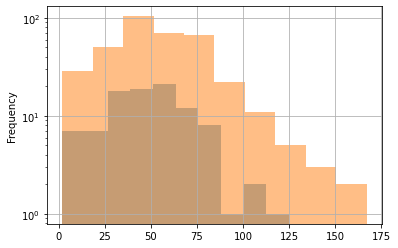

In [30]:
ny_nj_and_other = [df_ny_nj,df_other]
compare(ny_nj_and_other,'dec_call_count')

The median is slightly higher for other states but the variance is also higher.

#### Call Durations

----------------------------
ALL USER DATA
dec_call_sum
COUNT:  460
MEAN: 478.27
VARIANCE: 59889.54
STANDARD DEVIATION: 244.72
----------------------------


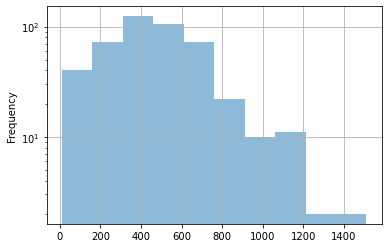

In [31]:
analyze(df_users,'dec_call_sum')

Another poisson distribution

----------------------------
USERS WITH SURF PLAN
dec_call_sum
COUNT:  311
MEAN: 484.50
VARIANCE: 59689.83
STANDARD DEVIATION: 244.32
----------------------------
----------------------------
USERS WITH ULTIMATE PLAN
dec_call_sum
COUNT:  149
MEAN: 465.26
VARIANCE: 60056.14
STANDARD DEVIATION: 245.06
----------------------------


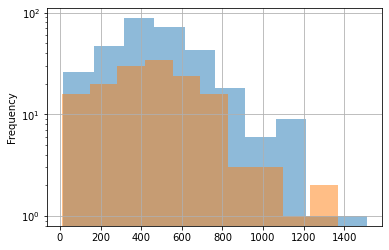

In [32]:
compare(surf_and_ultimate,'dec_call_sum')

The surf users have a higher median call duration but a fairly high variance. The surf users' median is right around the monthly limit of 500.

----------------------------
USERS IN NY OR NJ
dec_call_sum
COUNT:  96
MEAN: 438.00
VARIANCE: 49156.12
STANDARD DEVIATION: 221.71
----------------------------
----------------------------
USERS IN OTHER STATES
dec_call_sum
COUNT:  364
MEAN: 488.89
VARIANCE: 62179.86
STANDARD DEVIATION: 249.36
----------------------------


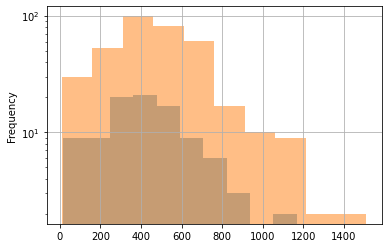

In [33]:
compare(ny_nj_and_other,'dec_call_sum')

The users in non-NY-NJ states have a higher median call duration but fairly high variance

#### Messages

----------------------------
ALL USER DATA
dec_message_count
COUNT:  380
MEAN: 50.19
VARIANCE: 1361.12
STANDARD DEVIATION: 36.89
----------------------------


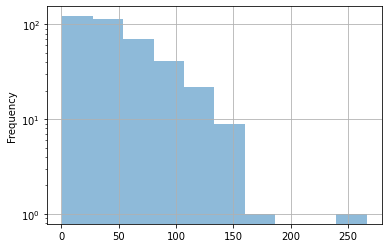

In [34]:
analyze(df_users,'dec_message_count')

Poisson distribution with a few outlier heavy users. 

----------------------------
USERS WITH SURF PLAN
dec_message_count
COUNT:  254
MEAN: 48.33
VARIANCE: 1349.79
STANDARD DEVIATION: 36.74
----------------------------
----------------------------
USERS WITH ULTIMATE PLAN
dec_message_count
COUNT:  126
MEAN: 53.94
VARIANCE: 1362.90
STANDARD DEVIATION: 36.92
----------------------------


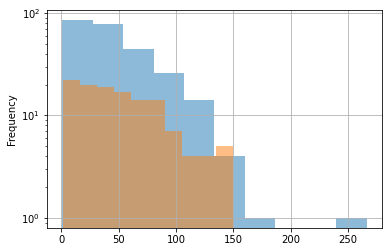

In [35]:
compare(surf_and_ultimate,'dec_message_count')

Higher median in ultimate plan, heavy message senders are on surf plan. The median message count for surf users is right at the monthly limit of 50 messages.

----------------------------
USERS IN NY OR NJ
dec_message_count
COUNT:  79
MEAN: 48.57
VARIANCE: 1109.94
STANDARD DEVIATION: 33.32
----------------------------
----------------------------
USERS IN OTHER STATES
dec_message_count
COUNT:  301
MEAN: 50.61
VARIANCE: 1426.17
STANDARD DEVIATION: 37.76
----------------------------


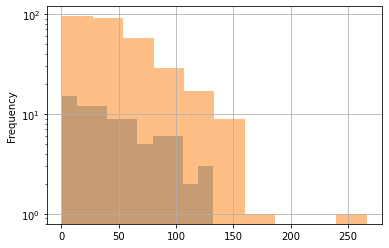

In [36]:
compare(ny_nj_and_other,'dec_message_count')

Higher median in non-NY-NJ states, also the outlier users.

#### Internet Usage

----------------------------
ALL USER DATA
dec_mb_sum
COUNT:  468
MEAN: 18768.96
VARIANCE: 68187294.81
STANDARD DEVIATION: 8257.56
----------------------------


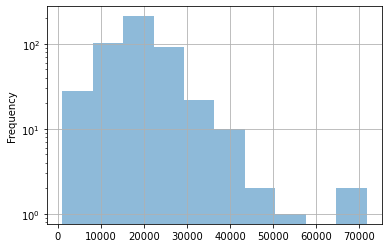

In [37]:
analyze(df_users,'dec_mb_sum')

A left-skewed normal distribution with a group of very heavy internet users.

----------------------------
USERS WITH SURF PLAN
dec_mb_sum
COUNT:  317
MEAN: 18735.65
VARIANCE: 71468975.93
STANDARD DEVIATION: 8453.93
----------------------------
----------------------------
USERS WITH ULTIMATE PLAN
dec_mb_sum
COUNT:  151
MEAN: 18838.89
VARIANCE: 61290718.13
STANDARD DEVIATION: 7828.84
----------------------------


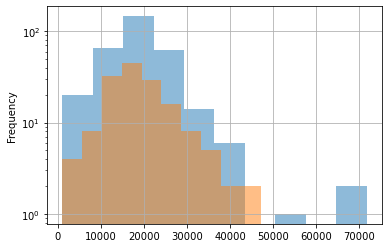

In [38]:
compare(surf_and_ultimate,'dec_mb_sum')

The median internet usage is slightly higher for ultimate plan users but all of the outlier heavy internet users are on the surf plan.

----------------------------
USERS IN NY OR NJ
dec_mb_sum
COUNT:  98
MEAN: 17972.24
VARIANCE: 58487481.74
STANDARD DEVIATION: 7647.71
----------------------------
----------------------------
USERS IN OTHER STATES
dec_mb_sum
COUNT:  370
MEAN: 18979.98
VARIANCE: 70543781.45
STANDARD DEVIATION: 8399.03
----------------------------


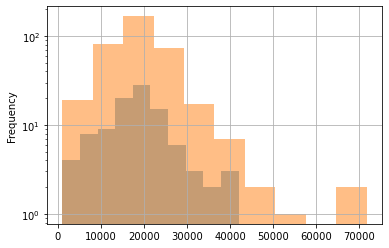

In [39]:
compare(ny_nj_and_other,'dec_mb_sum')

The heavy internet users and higher median is in the non-NY-NJ states.

#### Profit

----------------------------
ALL USER DATA
dec_profit
COUNT:  379
MEAN: 148.50
VARIANCE: 24379.31
STANDARD DEVIATION: 156.14
----------------------------


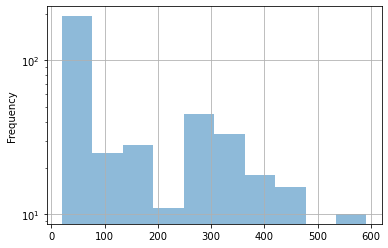

In [40]:
analyze(df_users,'dec_profit')

Abnormal poisson distribution.

----------------------------
USERS WITH SURF PLAN
dec_profit
COUNT:  253
MEAN: 80.32
VARIANCE: 16532.44
STANDARD DEVIATION: 128.58
----------------------------
----------------------------
USERS WITH ULTIMATE PLAN
dec_profit
COUNT:  126
MEAN: 285.38
VARIANCE: 12065.68
STANDARD DEVIATION: 109.84
----------------------------


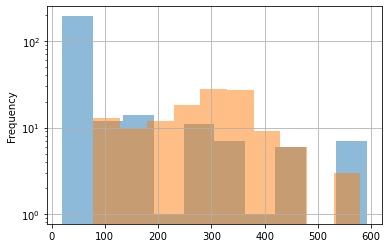

In [41]:
compare(surf_and_ultimate,'dec_profit')

Overall distribution now makes some more sense. The surf plan users have a poisson distribution while the ultimate users have very flat normal distribution while both plans have heavy users with massive overage charges. The mean profit of the ultimate plan is much higher. It looks like the surf users are more either light users or are more careful about their overuse as they chose the cheaper plan.

----------------------------
USERS IN NY OR NJ
dec_profit
COUNT:  79
MEAN: 140.85
VARIANCE: 24186.59
STANDARD DEVIATION: 155.52
----------------------------
----------------------------
USERS IN OTHER STATES
dec_profit
COUNT:  300
MEAN: 150.51
VARIANCE: 24410.62
STANDARD DEVIATION: 156.24
----------------------------


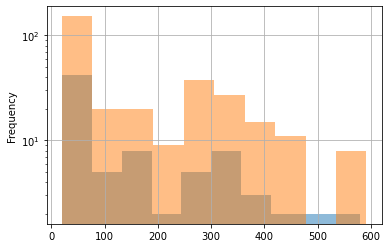

In [42]:
compare(ny_nj_and_other,'dec_profit')

Both share similar distribution, slightly higher profit from other states.

### Step 4. Test the hypotheses

We will test the hypotheses in terms of profit between the user comparisons because it is the most important for a business and appeared in the analysis and the largest difference in distribution. The null hypothesis is that the distribution of the user profit data from both surf and ultimate plan users are not significantly different. The alternative hypothesis is that there is a statistically significant difference between the distributions of the user types. The p-value is the level of statistical significance in the difference between the mean and the means value it's compared to.

The variance of the december profits for surf plan users is: 16532.44
The variance of the december profits for ultimate plan users is: 12065.68


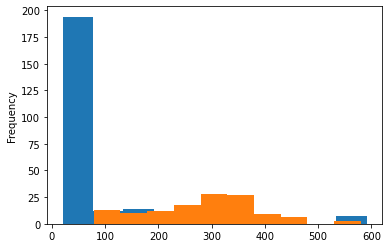

In [43]:
alpha = .05 # critical statistical significance level, if the p-value is less than alpha, we reject the hypothesis
df_surf_non_zero = df_surf.query('dec_profit > 0')
df_ultimate_non_zero = df_ultimate.query('dec_profit > 0')
df_surf_non_zero['dec_profit'].plot(kind="hist")
df_ultimate_non_zero['dec_profit'].plot(kind="hist")
print("The variance of the december profits for surf plan users is: {:.2f}".format(np.var(df_surf_non_zero['dec_profit'])))
print("The variance of the december profits for ultimate plan users is: {:.2f}".format(np.var(df_ultimate_non_zero['dec_profit'])))

In [44]:
# Calculate the p-value with equal_val as False
results = st.ttest_ind(
        df_surf_non_zero['dec_profit'], 
        df_ultimate_non_zero['dec_profit'],
        equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  5.1821814659688007e-42
We reject the null hypothesis


This indicates that there is a statistically significant difference between surf and ultimate users in terms of profit.

The variance of the december profits for users in NY-NJ is: 24186.59
The variance of the december profits for users in other states is: 24410.62


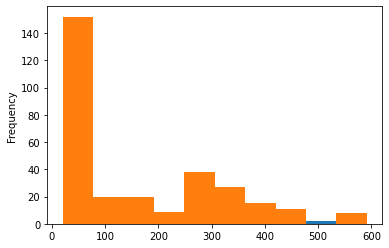

In [45]:
df_ny_nj_non_zero = df_ny_nj.query('dec_profit > 0')
df_other_non_zero = df_other.query('dec_profit > 0')
df_ny_nj_non_zero['dec_profit'].plot(kind="hist")
df_other_non_zero['dec_profit'].plot(kind="hist")
print("The variance of the december profits for users in NY-NJ is: {:.2f}".format(np.var(df_ny_nj_non_zero['dec_profit'])))
print("The variance of the december profits for users in other states is: {:.2f}".format(np.var(df_other_non_zero['dec_profit'])))


In [46]:
# Calculate the p-value with equal_val as True
# The variances of the statistical populations from which the samples are taken are approximately equal
results = st.ttest_ind(
        df_ny_nj_non_zero['dec_profit'], 
        df_other_non_zero['dec_profit'],
        equal_var = True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.6258773396081954
We can't reject the null hypothesis


This indicates that there is no statistically significant difference between users in NY-NJ and the rest of the states by profit.

The result of the hypotheses were predictable by the analysis on profit between the user groups. The median of the ultimate users was much higher than median of the surf users, even by a difference larger than the standard distribution. Conversely, the users by states had very similar distributions.

## Conclusion

I think the most important part of the analysis was looking at the yearly medians to get an overall picture of the usages and profits so I would could choose to analyze the proper month and focus efforts. Throughout the analysis it was apparent that the median usages by surf users was right around the respective monthly limits. This makes sense that users on the cheaper plan want to spend less and incur less overages (even more so because their overage fees are higher). This causes the median profit on surf plan users to be much less than the ultimate pln users who aren't as put off by the smaller overage charges. It also explains why the distribution sharply increases towards the flat monthly fee of the surf users. 